# Neural Network Creation

## Importing Dependencies and Data

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
# Get Path from local 'Data' Folder
path = r"D:\1-Toys and Games.csv"

# Load Data.
n_rows = 500
column_subset = ['monthlyUnitsSold', 'imageUrl', 'title', 'numberOfSellers', 'isVariation', 'buyBoxPrice', 'numberOfItems']

img_df = pd.read_csv(path, nrows=n_rows, usecols=['monthlyUnitsSold', 'imageUrl'])
title_df = pd.read_csv(path, nrows=n_rows, usecols=['monthlyUnitsSold', 'title'])
features_df = pd.read_csv(path, nrows=n_rows, usecols=['monthlyUnitsSold', 'numberOfSellers', 'isVariation', 'buyBoxPrice', 'numberOfItems'])

## Data Cleaning

In [196]:
# Print DataFrame Sizes before Cleaning
print(f'Image DataFrame Size: {img_df.shape}')
print(f'Title DataFrame Size: {title_df.shape}')
print(f'Features DataFrame Size: {features_df.shape}')

Image DataFrame Size: (500, 2)
Title DataFrame Size: (500, 2)
Features DataFrame Size: (500, 5)


In [197]:
# Drop NaNs
img_df.dropna(inplace=True)
title_df.dropna(inplace=True)
features_df.dropna(inplace=True)

In [198]:
# Drop Duplicates
img_df.drop_duplicates(inplace=True)
title_df.drop_duplicates(inplace=True)

In [199]:
# Drop Outliers
outlier_limit = 1000000
img_df = img_df[img_df['monthlyUnitsSold'] < outlier_limit]
title_df = title_df[title_df['monthlyUnitsSold'] < outlier_limit]
features_df = features_df[features_df['monthlyUnitsSold'] < outlier_limit]

In [200]:
# Drop Zeros
img_df = img_df[img_df['monthlyUnitsSold'] > 0]
title_df = title_df[title_df['monthlyUnitsSold'] > 0]
features_df = features_df[features_df['monthlyUnitsSold'] > 0]

In [201]:
# Rename Columns for Clarity
img_df.rename(columns={'monthlyUnitsSold':'sales'}, inplace=True)
title_df.rename(columns={'monthlyUnitsSold':'sales'}, inplace=True)
features_df.rename(columns={'monthlyUnitsSold':'sales', 'buyBoxPrice':'price'}, inplace=True)

In [202]:
# Print DataFrame Sizes after Cleaning
print(f'Image DataFrame Size: {img_df.shape}')
print(f'Title DataFrame Size: {title_df.shape}')
print(f'Features DataFrame Size: {features_df.shape}')

Image DataFrame Size: (499, 2)
Title DataFrame Size: (496, 2)
Features DataFrame Size: (500, 5)


## Data Preprocessing

In [203]:
# Convert isVariation from boolean to int
features_df['isVariation'] = features_df['isVariation'].astype(int)

In [204]:
# Convert imageUrl column from links to image data (pixels) and track progress with swifter
# imageUrl will be in this format: data:image/jpeg;base64/9j/4AAQSkZJRgABAQAAAQABAAD...
import swifter
import numpy as np
import base64
import io
from PIL import Image

def get_image_data(image_url: str):
    # Get the image data from the image url
    image_data = image_url.split(',')[1]
    # Convert the image data from base64 to bytes
    image_data = base64.b64decode(image_data)
    # Convert the image data from bytes to an image
    image_data = Image.open(io.BytesIO(image_data))
    # Convert the image to RGB
    image_data = image_data.convert('RGB')
    # Convert the image to an array
    image_data = np.array(image_data)
    # Return the image data
    return image_data


# Apply the function to the imageUrl column
img_df['imageData'] = img_df['imageUrl'].swifter.apply(get_image_data)

Pandas Apply:   0%|          | 0/499 [00:00<?, ?it/s]

In [205]:
# Resize all the images to the same target size (change the imageData column)
from skimage.transform import resize

target_size = 128
img_df['imageData'] = img_df['imageData'].swifter.apply(resize, output_shape=(target_size, target_size, 3))

Pandas Apply:   0%|          | 0/499 [00:00<?, ?it/s]

## Extracting Colors from Images

## Natural Language Processing - Title

In [206]:
# Import the necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download the necessary libraries
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Create a list of stopwords
stop_words = stopwords.words('english')
# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shtey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shtey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shtey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [207]:
# Create a function to clean the text
def clean_text(text: str):
    # Convert the text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back together
    text = ' '.join(tokens)
    # Return the text
    return text

# Clean the title column and create a new column called clean_title
title_df['clean_title'] = title_df['title'].swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/496 [00:00<?, ?it/s]

In [208]:
title_df.head(5)

,title,sales,clean_title
0,"Animal Adventure | Sqoosh2Poof Giant, Cuddly, ...",124,"animal adventure | sqoosh2poof giant , cuddly ..."
1,DJI Mini 3 Pro (DJI RC) & Fly More Kit Plus – ...,3046,dji mini 3 pro ( dji rc ) & fly kit plus – lig...
2,"Classic Handheld Game Console, Wireless Classi...",15983,"classic handheld game console , wireless class..."
3,Step2 Rain Showers Splash Pond Water Table | K...,28285,step2 rain shower splash pond water table | ki...
4,Drone with 1080P Dual HD Camera - 2023 Upgradd...,5383,drone 1080p dual hd camera - 2023 upgradded rc...


## Creating a Natural Language Processing Model

We will use the bag of words model to create a model that predicts the sales based on the title of the product. The bag of words model is a simple model that counts the number of times a word appears in a document. We will use the CountVectorizer class from sklearn to create a bag of words model. We will then use the bag of words model to create different models, like a linear regression model, a random forest model, a neural network model, and a support vector machine model. We will then compare the models and choose the best one.

In [209]:
# Import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [210]:
# Create a bag of words model
vectorizer = CountVectorizer()
# Fit the model to the clean_title column
vectorizer.fit(title_df['clean_title'])
# Transform the clean_title column into a bag of words
title_bow = vectorizer.transform(title_df['clean_title'])

In [211]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(title_bow, title_df['sales'], test_size=0.2, random_state=42)

### Linear Regression Model

Linear Regression RMSE: 6488.326336260259
Linear Regression R2: 0.02459007870412111


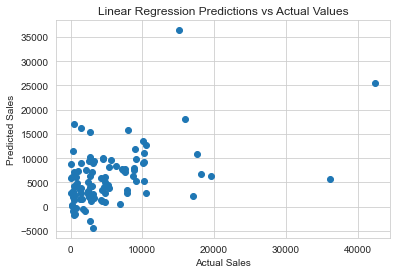

In [212]:
# Create a linear regression model
lr_model = LinearRegression()
# Fit the model to the training data
lr_model.fit(X_train, y_train)
# Make predictions on the test data
lr_predictions = lr_model.predict(X_test)
# Calculate the root mean squared error
lr_rmse = sqrt(mean_squared_error(y_test, lr_predictions))
print(f'Linear Regression RMSE: {lr_rmse}')
# Calculate the R squared value
lr_r2 = lr_model.score(X_test, y_test)
print(f'Linear Regression R2: {lr_r2}')
# Graph the predictions vs the actual values
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Predictions vs Actual Values')
plt.show()

### Random Forest Model

Random Forest RMSE: 5811.722224364196
Random Forest R2: 0.21741504206272633


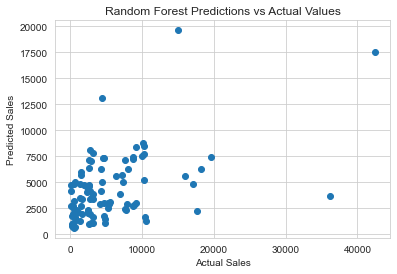

In [213]:
# Create a random forest model
rf_model = RandomForestRegressor(random_state=42)
# Fit the model to the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)
# Calculate the root mean squared error
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest RMSE: {rf_rmse}')
# Calculate the R squared value
rf_r2 = rf_model.score(X_test, y_test)
print(f'Random Forest R2: {rf_r2}')
# Graph the predictions vs the actual values
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Predictions vs Actual Values')
plt.show()

### Support Vector Machine Model

Support Vector Machine RMSE: 6955.554583624676
Support Vector Machine R2: -0.12094763456818414


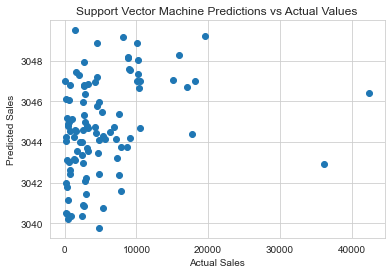

In [214]:
# Create a support vector machine model
svm_model = SVR()
# Fit the model to the training data
svm_model.fit(X_train, y_train)
# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)
# Calculate the root mean squared error
svm_rmse = sqrt(mean_squared_error(y_test, svm_predictions))
print(f'Support Vector Machine RMSE: {svm_rmse}')
# Calculate the R squared value
svm_r2 = svm_model.score(X_test, y_test)
print(f'Support Vector Machine R2: {svm_r2}')
# Graph the predictions vs the actual values
plt.scatter(y_test, svm_predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Support Vector Machine Predictions vs Actual Values')
plt.show()

### Neural Network Model

Neural Network RMSE: 8251.917319323587
Neural Network R2: -0.5777258253941064


C:\Users\shtey\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


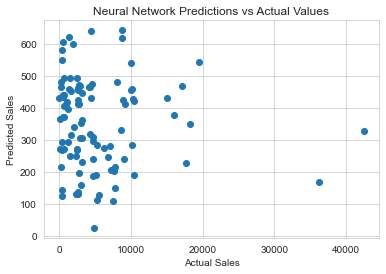

In [215]:
# Create a neural network model
nn_model = MLPRegressor(random_state=42)
# Fit the model to the training data
nn_model.fit(X_train, y_train)
# Make predictions on the test data
nn_predictions = nn_model.predict(X_test)
# Calculate the root mean squared error
nn_rmse = sqrt(mean_squared_error(y_test, nn_predictions))
print(f'Neural Network RMSE: {nn_rmse}')
# Calculate the R squared value
nn_r2 = nn_model.score(X_test, y_test)
print(f'Neural Network R2: {nn_r2}')
# Graph the predictions vs the actual values
plt.scatter(y_test, nn_predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Neural Network Predictions vs Actual Values')
plt.show()

Based on the results of the models, the random forest model is the best model. It has the lowest root mean squared error and the highest R squared value. The random forest model is the best model because it is a more complex model than the linear regression model and the support vector machine model, but it is not as complex as the neural network model. The random forest model is also a good model because it is not prone to overfitting like the neural network model.
Now, we will perform Grid Search to find the best parameters for the random forest model.

### Grid Search

In [216]:
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV
# Create a dictionary of parameters to test
param_grid = {'n_estimators': [10, 50, 100, 200, 500],
              'max_depth': [None, 10, 50, 100, 200, 500],
              'min_samples_split': [2, 5, 10, 20, 50],
              'min_samples_leaf': [1, 2, 5, 10, 20]}
# Create a random forest model
rf_model = RandomForestRegressor(random_state=42)
# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
# Print the best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 50}


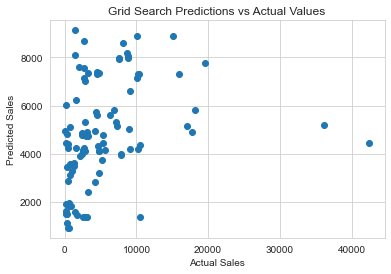

In [217]:
# Make predictions on the test data
grid_predictions = grid_search.predict(X_test)
# Graph Predictions
plt.scatter(y_test, grid_predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Grid Search Predictions vs Actual Values')
plt.show()

## Creating a KNN Model and a Convolutional Neural Network Model

We will now create a KNN model and a convolutional neural network model to predict the sales of a product based on its thumbnail image. We will compare the results of these models to the results of the models that used the product title to predict the sales of a product.

## Convolutional Neural Network Model

In [222]:
img_df.head()

,imageUrl,sales,imageData
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",124,"[[[0.9999999999999998, 0.9999999999999998, 0.9..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",3046,"[[[0.9999999999999998, 0.9999999999999998, 0.9..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",15983,"[[[0.9999999999999999, 0.9999999999999999, 0.9..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",28285,"[[[0.9999999999999998, 0.9999999999999998, 0.9..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",5383,"[[[0.9999999999999998, 0.9999999999999998, 0.9..."


In [223]:
# Import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Preprocessing

In [224]:
BATCH_SIZE = 32

In [ ]:
# Create an ImageDataGenerator object
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Create a training ImageDataGenerator object
train_data_gen = image_generator.flow_from_dataframe(dataframe=img_df, directory='images', x_col='imageData', y_col='sales', target_size=(target_size, target_size), class_mode='raw', batch_size=BATCH_SIZE, subset='training')
# Create a validation ImageDataGenerator object
val_data_gen = image_generator.flow_from_dataframe(dataframe=img_df, directory='images', x_col='imageData', y_col='sales', target_size=(target_size, target_size), class_mode='raw', batch_size=BATCH_SIZE, subset='validation')

### Creating the Model


In [225]:
# Create a convolutional neural network model
cnn = Sequential()
# Add a convolutional layer
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, 3)))
# Add a pooling layer
cnn.add(MaxPooling2D((2, 2)))
# Add another convolutional layer
cnn.add(Conv2D(64, (3, 3), activation='relu'))
# Add another pooling layer
cnn.add(MaxPooling2D((2, 2)))
# Add another convolutional layer
cnn.add(Conv2D(128, (3, 3), activation='relu'))
# Add another pooling layer
cnn.add(MaxPooling2D((2, 2)))
# Add a flattening layer
cnn.add(Flatten())
# Add a dropout layer
cnn.add(Dropout(0.5))
# Add a dense layer
cnn.add(Dense(512, activation='relu'))
# Add a dropout layer
cnn.add(Dropout(0.5))
# Add an output layer
cnn.add(Dense(1))
# Compile the model
cnn.compile(optimizer='adam', loss='mse', metrics=['mse'])

### Training and Optimization

In [ ]:
# Create an EarlyStopping object
early_stop = EarlyStopping(monitor='val_loss', patience=3)
# Fit the model using the ImageDataGenerator objects
cnn.fit(train_data_gen, validation_data=val_data_gen, epochs=20, callbacks=[early_stop])